# ROMY Events - Data 2

In [1]:
import os
import gc
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from andbro__store_as_pickle import __store_as_pickle


In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

### Configurations

In [3]:
config = {}

# path to data
config['path_to_data'] = data_path+"romy_events/data/"

config['path_to_figs'] = data_path+"romy_events/figures/"

config['path_to_mseed'] = data_path+"romy_events/data/waveforms/ACC/"

# specify event file
config['eventfile'] = "ROMYevents_2019_2024_status.csv"

# specify catalog
config['catalogfile'] = "catalogs/ROMY_global_catalog_20190101_20240430.pkl"

# ROMY coordinates
config['sta_lon'] = 11.275501
config['sta_lat'] = 48.162941


### Load Catalog

In [4]:
cat = pd.read_pickle(config['path_to_data']+config['catalogfile'])

# add row with UTC times
cat['time_utc'] = [str(obs.UTCDateTime(str(_e).split('.')[0], precision=0)) for _e in cat.timestamp]

cat['depth_km'] = cat.depth / 1000

In [5]:
cat

,timestamp,latitude,longitude,depth,magnitude,type,seconds,backazimuth,distances_km,time_utc,depth_km
0,2019-01-04 06:24:16.200,-27.9600,-172.6600,5000.0,6.03,mb,0.000000e+00,9.861260,17736.186488,2019-01-04T06:24:16Z,5.0000
1,2019-01-05 19:25:38.000,-8.1802,-71.6436,583477.7,6.30,mb,1.332818e+05,259.452974,10159.784920,2019-01-05T19:25:38Z,583.4777
2,2019-01-06 17:27:19.630,2.3041,126.7147,48386.1,6.15,mb,2.125834e+05,68.838795,11666.901912,2019-01-06T17:27:19Z,48.3861
3,2019-01-20 01:32:51.840,-30.0772,-71.3177,65457.4,6.54,mb,1.364916e+06,244.236683,11925.552182,2019-01-20T01:32:51Z,65.4574
4,2019-01-22 05:10:05.180,-10.2877,119.1299,34717.2,6.04,mb,1.550749e+06,83.386067,12178.866673,2019-01-22T05:10:05Z,34.7172
...,...,...,...,...,...,...,...,...,...,...,...
506,2024-04-15 22:38:59.000,29.4000,131.7000,NaN,6.10,Mwp,1.666377e+08,48.804818,9572.239736,2024-04-15T22:38:59Z,NaN
507,2024-04-17 14:14:47.940,33.2380,132.1610,38800.0,6.18,M,1.667802e+08,46.269221,9249.862671,2024-04-17T14:14:47Z,38.8000
508,2024-04-22 18:32:50.210,23.9330,121.6310,10000.0,6.31,M,1.672277e+08,59.287613,9449.603923,2024-04-22T18:32:50Z,10.0000
509,2024-04-27 16:29:45.120,-7.9160,107.3200,71000.0,6.08,Mw,1.676523e+08,90.655824,11108.644001,2024-04-27T16:29:45Z,71.0000


### Load Event Data

In [6]:
# load data base
events = pd.read_csv(config['path_to_data']+config['eventfile'], header=0, skiprows=4)

# prepare dataframe
events.dropna(subset="Event", inplace=True)
events.sort_values(by="# Event", inplace=True)
events.reset_index(drop=True, inplace=True)

# add row with UTC times
events['time_utc'] = [str(obs.UTCDateTime(f"{_e.split('_')[1]}T{_e.split('_')[2]}", precision=0)) for _e in events.Event]

events

,# Event,Event,WET,FUR,RLAS,ROMY-Z,ROMY-U,ROMY-V,ROMY-W,WETQ,...,VQ,WQ,T1,T2,Comment,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,time_utc
0,0.0,000_20190104_062416_filtered.png,False,False,False,False,False,False,False,False,...,False,False,0.0,0.0,NaN,0.0,20190104.0,62416.0,filtered.png,2019-01-04T06:24:16Z
1,1.0,001_20190105_192538_filtered.png,True,True,True,False,False,False,False,False,...,False,False,0.0,4000.0,NaN,1.0,20190105.0,192538.0,filtered.png,2019-01-05T19:25:38Z
2,2.0,002_20190106_172719_filtered.png,True,True,True,True,False,False,False,False,...,False,False,0.0,4600.0,Z spike,2.0,20190106.0,172719.0,filtered.png,2019-01-06T17:27:19Z
3,3.0,003_20190120_013251_filtered.png,True,True,True,True,False,True,False,False,...,True,False,0.0,0.0,"Z spikes, V spikes",3.0,20190120.0,13251.0,filtered.png,2019-01-20T01:32:51Z
4,4.0,004_20190122_051005_filtered.png,True,True,True,True,False,True,False,False,...,True,False,0.0,0.0,"Z spikes, V spikes",4.0,20190122.0,51005.0,filtered.png,2019-01-22T05:10:05Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,502.0,502_20240414_205632_filtered.png,True,True,True,True,True,True,False,False,...,False,False,0.0,7000.0,Z spike,502.0,20240414.0,205632.0,filtered.png,2024-04-14T20:56:32Z
411,503.0,503_20240415_223859_filtered.png,True,True,True,True,False,False,False,False,...,False,False,0.0,0.0,Z spikes,503.0,20240415.0,223859.0,filtered.png,2024-04-15T22:38:59Z
412,504.0,504_20240417_141447_filtered.png,True,True,True,True,True,True,False,False,...,True,False,0.0,0.0,"U distorted, V spikes",504.0,20240417.0,141447.0,filtered.png,2024-04-17T14:14:47Z
413,505.0,505_20240422_183250_filtered.png,True,True,True,True,True,True,False,False,...,False,False,0.0,0.0,NaN,505.0,20240422.0,183250.0,filtered.png,2024-04-22T18:32:50Z


### Merge Dataframes

In [7]:
df = pd.merge(left=cat, right=events, on="time_utc")

df.dropna(subset="depth", inplace=True)

df.reset_index(drop=True, inplace=True)


In [8]:
df

,timestamp,latitude,longitude,depth,magnitude,type,seconds,backazimuth,distances_km,time_utc,...,UQ,VQ,WQ,T1,T2,Comment,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,2019-01-04 06:24:16.200,-27.9600,-172.6600,5000.0,6.03,mb,0.000000e+00,9.861260,17736.186488,2019-01-04T06:24:16Z,...,False,False,False,0.0,0.0,NaN,0.0,20190104.0,62416.0,filtered.png
1,2019-01-05 19:25:38.000,-8.1802,-71.6436,583477.7,6.30,mb,1.332818e+05,259.452974,10159.784920,2019-01-05T19:25:38Z,...,False,False,False,0.0,4000.0,NaN,1.0,20190105.0,192538.0,filtered.png
2,2019-01-06 17:27:19.630,2.3041,126.7147,48386.1,6.15,mb,2.125834e+05,68.838795,11666.901912,2019-01-06T17:27:19Z,...,False,False,False,0.0,4600.0,Z spike,2.0,20190106.0,172719.0,filtered.png
3,2019-01-20 01:32:51.840,-30.0772,-71.3177,65457.4,6.54,mb,1.364916e+06,244.236683,11925.552182,2019-01-20T01:32:51Z,...,False,True,False,0.0,0.0,"Z spikes, V spikes",3.0,20190120.0,13251.0,filtered.png
4,2019-01-22 05:10:05.180,-10.2877,119.1299,34717.2,6.04,mb,1.550749e+06,83.386067,12178.866673,2019-01-22T05:10:05Z,...,False,True,False,0.0,0.0,"Z spikes, V spikes",4.0,20190122.0,51005.0,filtered.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,2024-04-09 09:48:04.720,2.8722,126.5413,19500.0,6.50,Mww,1.660730e+08,68.615081,11605.761454,2024-04-09T09:48:04Z,...,False,False,False,0.0,0.0,Z spikes,500.0,20240409.0,94804.0,filtered.png
411,2024-04-14 20:56:32.340,-6.4849,151.2289,70500.0,6.34,Mww,1.665451e+08,52.261587,14045.253829,2024-04-14T20:56:32Z,...,False,False,False,0.0,7000.0,Z spike,502.0,20240414.0,205632.0,filtered.png
412,2024-04-17 14:14:47.940,33.2380,132.1610,38800.0,6.18,M,1.667802e+08,46.269221,9249.862671,2024-04-17T14:14:47Z,...,True,True,False,0.0,0.0,"U distorted, V spikes",504.0,20240417.0,141447.0,filtered.png
413,2024-04-22 18:32:50.210,23.9330,121.6310,10000.0,6.31,M,1.672277e+08,59.287613,9449.603923,2024-04-22T18:32:50Z,...,False,False,False,0.0,0.0,NaN,505.0,20240422.0,183250.0,filtered.png


### Select good events for RLAS and ROMY-Z

In [9]:
## seclt rows with ROMY-Z, RLAS, FUR and WET
select_z_idx = list(np.where((df.RLAS == True) & (df['ROMY-Z'] == True) & (df['WET'] == True) & df['FUR'] == True)[0])
select_z = df[df.index.isin(select_z_idx)]
print(select_z.shape)

## remove bad quality RLAS
select_z = select_z[select_z.RLASQ == False]
print(select_z.shape)


## remove bad quality ROMY (unless they can be saved with cutting according to T1 - T2)
select_z = select_z[(select_z.ZQ == True) & (select_z.T1 != 0) | (select_z.T2 != 0)]
print(select_z.shape)


select_z.reset_index(drop=True, inplace=True)

# write to pickle file
# select_z.to_pickle(config['path_to_data']+config['eventfile'].split('.')[0]+"_select_z.pkl")


(157, 34)
(156, 34)
(48, 34)


## Load Event Selection Z

In [ ]:
events_z = pd.read_pickle(config['path_to_data']+config['eventfile'].split('.')[0]+"_select_z.pkl")
for _k, (_i, ev) in enumerate(events_z.iterrows()):

    if _k != 0:
        continue

    print(_k, "  ", ev.Event.replace("_filtered.png", ".mseed"))
    print(ev.T1)

In [20]:
events_z

,timestamp,latitude,longitude,depth,magnitude,type,seconds,backazimuth,distances_km,time_utc,...,UQ,VQ,WQ,T1,T2,Comment,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,2019-01-06 17:27:19.630,2.3041,126.7147,48386.1,6.15,mb,2.125834e+05,68.838795,11666.901912,2019-01-06T17:27:19Z,...,False,False,False,0.0,4600.0,Z spike,2.0,20190106.0,172719.0,filtered.png
1,2019-01-22 19:01:42.120,-43.1281,42.4198,2868.9,6.41,mb,1.600646e+06,157.636430,10564.431457,2019-01-22T19:01:42Z,...,False,False,False,2000.0,5000.0,Z spikes,5.0,20190122.0,190142.0,filtered.png
2,2019-04-05 16:14:16.660,-55.9539,-27.8876,62254.6,6.24,mb,7.897800e+06,202.056124,12101.637111,2019-04-05T16:14:16Z,...,False,False,False,0.0,7000.0,Z spikes,18.0,20190405.0,161416.0,filtered.png
3,2019-04-22 09:10:53.710,11.4490,123.0960,20000.0,6.10,mb,9.341198e+06,65.948562,10626.453243,2019-04-22T09:10:53Z,...,False,False,True,1500.0,6000.0,"Z spike, W poor",22.0,20190422.0,91053.0,filtered.png
4,2019-04-23 05:37:53.210,11.7681,125.1502,67662.2,6.35,mb,9.414817e+06,64.160759,10737.267159,2019-04-23T05:37:53Z,...,False,False,True,0.0,6000.0,W poor,23.0,20190423.0,53753.0,filtered.png
5,2019-05-03 07:25:30.660,-6.8735,160.1021,23660.4,6.15,mb,1.028527e+07,42.708422,14569.265142,2019-05-03T07:25:30Z,...,False,False,False,1000.0,9000.0,Z spike,24.0,20190503.0,72530.0,filtered.png
6,2019-05-14 12:58:26.610,-4.1993,152.6203,15654.0,6.47,mb,1.125565e+07,49.353147,13909.590340,2019-05-14T12:58:26Z,...,True,False,False,0.0,8000.0,U spikes,26.0,20190514.0,125826.0,filtered.png
7,2019-06-04 04:39:17.280,29.0669,139.2786,437231.7,6.24,mb,1.304010e+07,43.469931,10009.499802,2019-06-04T04:39:17Z,...,False,False,False,1000.0,6000.0,Z spikes,31.0,20190604.0,43917.0,filtered.png
8,2019-07-31 15:02:33.210,-16.2151,168.0778,187825.3,6.07,mb,1.800230e+07,38.504120,15881.424108,2019-07-31T15:02:33Z,...,False,False,False,0.0,9000.0,Z spike,42.0,20190731.0,150233.0,filtered.png
9,2019-08-27 23:55:20.980,-60.1851,-26.7370,30634.6,6.52,mb,2.036706e+07,199.444601,12492.969626,2019-08-27T23:55:20Z,...,False,True,False,0.0,8000.0,"Z spike, V spike",48.0,20190827.0,235520.0,filtered.png


### Pick maximal Amplitudes in Fband

In [11]:
def __get_event_window(st0, deltaT1=60, deltaT2=2, plot=False):

    from obspy.signal.trigger import coincidence_trigger
    from obspy.signal.trigger import recursive_sta_lta
    from obspy.signal.trigger import plot_trigger

    st_trig = obs.Stream()
    st_trig += st0.select(station="FUR", channel="*Z").copy()
    st_trig += st0.select(station="FUR", channel="*N").copy()
    st_trig += st0.select(station="FUR", channel="*E").copy()
    st_trig += st0.select(station="ROMY", channel="*Z").copy()

    st_trig = st_trig.detrend("demean")
    st_trig = st_trig.filter("bandpass", freqmin=0.01, freqmax=0.1, corners=4, zerophase=True)

    df = st_trig[0].stats.sampling_rate

    sta = 10 # seconds
    lta = 180 # seconds

    thr_on = 4
    thr_off = 0.1

    # cft = recursive_sta_lta(st_trig[3].data, int(sta * df), int(lta * df))
    # plot_trigger(st_trig[3], cft, thr_on, thr_off)

    trig = coincidence_trigger("recstalta", thr_on, thr_off, st_trig, 4, sta=sta, lta=lta, details=True, similarity_threshold=0.)

    t1 = trig[0]['time'] - deltaT1
    t2 = trig[0]['time'] + trig[0]['duration'] * deltaT2

    if plot:

        Nrow, Ncol = len(st_trig), 1

        font = 12

        fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8), sharex=True)

        plt.subplots_adjust(hspace=0)

        for _k, tr in enumerate(st_trig):

            if "ROMY" in tr.stats.station:
                ax[_k].plot(tr.times(), tr.data*1e9, color="k", label=f"{tr.stats.station}.{tr.stats.channel}")
            else:
                ax[_k].plot(tr.times(), tr.data*1e6, color="k", label=f"{tr.stats.station}.{tr.stats.channel}")

            ax[_k].axvline(trig[0]['time']-tr.stats.starttime - deltaT1, -10, 10)
            ax[_k].axvline(trig[0]['time']-tr.stats.starttime + trig[0]['duration'] * deltaT2, -10, 10)


        for _n in range(Nrow):
            ax[_n].grid(ls=":", zorder=0)
            ax[_n].legend(loc=1)

        plt.show();


    return t1, t2

In [12]:
def __get_fband_amplitude(st0, fmin, fmax, t1, t2, amp="maxima", plot=False):

    from functions.get_octave_bands import __get_octave_bands
    from scipy.signal import hilbert

    st_amp = obs.Stream()
    st_amp += st0.select(station="FUR", channel="*Z").copy()
    st_amp += st0.select(station="FUR", channel="*R").copy()
    st_amp += st0.select(station="FUR", channel="*T").copy()
    st_amp += st0.select(station="WET", channel="*Z").copy()
    st_amp += st0.select(station="WET", channel="*R").copy()
    st_amp += st0.select(station="WET", channel="*T").copy()
    st_amp += st0.select(station="ROMY",channel="*Z").copy()
    st_amp += st0.select(station="RLAS",channel="*Z").copy()

    st_amp = st_amp.trim(t1, t2)
    st_amp = st_amp.detrend("demean")


    flower, fupper, fcenter = __get_octave_bands(fmin, fmax, faction_of_octave=6, plot=False)

    out = {}
    for fl, fu, fc in zip(flower, fupper, fcenter):

        out[fc] = {}

        stx = st_amp.copy()

        df = stx[0].stats.sampling_rate

        stx = stx.detrend("linear")

        stx = stx.taper(0.05, type="cosine")

        # stx.plot(equal_scale=False);

        # zero padding to avoid filter shift effect
        Tpadding = 4*3600 # seconds
        Npadding = int(Tpadding*df)


        for tr in stx:
            # tr.data = np.pad(tr.data, (Npadding, Npadding), 'constant', constant_values=(tr.data[0], tr.data[-1]))
            tr.data = np.pad(tr.data, (Npadding, Npadding), 'constant', constant_values=(0, 0))
            tr.stats.npts = tr.stats.npts + 2*Npadding

        stx.plot(equal_scale=False);

        stx = stx.filter("bandpass", freqmin=fl, freqmax=fu, corners=4, zerophase=True)

        stx.plot(equal_scale=False);

        stx = stx.taper(0.01, type="cosine")

        for tr in stx:
            name = f"{tr.stats.station}.{tr.stats.channel}"
            if amp == "maxima":
                out[fc][name] = np.nanmax(abs(tr.data))
            elif amp == "mean":
                out[fc][name] = np.nanmean(abs(tr.data))
            elif amp == "perc95":
                out[fc][name] = np.nanpercentile(abs(tr.data), 95)
            elif amp == "envelope":
                out[fc][name] = np.nanmax(abs(hilbert(tr.data)))

    if plot:

        plt.figure(figsize=(15, 5))
        for _i, fc in enumerate(out.keys()):

            if _i == 0:
                plt.scatter(fc, out[fc]["ROMY.BJZ"], color="tab:blue", edgecolor="k", label="ROMY", zorder=2)
                plt.scatter(fc, out[fc]["RLAS.BJZ"], color="tab:orange", edgecolor="k", label="RLAS", zorder=2)
            else:
                plt.scatter(fc, out[fc]["ROMY.BJZ"], color="tab:blue", edgecolor="k", zorder=2)
                plt.scatter(fc, out[fc]["RLAS.BJZ"], color="tab:orange", edgecolor="k", zorder=2)

        plt.xscale("log")
        plt.yscale("log")
        plt.grid(which="both", zorder=0, alpha=0.5, color="grey")
        plt.legend(loc=2)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude (rad/s)")
        plt.show();

    return out

In [13]:
def __make_control_plot(ev_num, st0, out, t1, t2, path_to_figs, plot=False):

    import gc
    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    st1 = obs.Stream()
    st1 += st0.select(station="FUR", channel="*Z").copy()
    st1 += st0.select(station="FUR", channel="*R").copy()
    st1 += st0.select(station="FUR", channel="*T").copy()
    st1 += st0.select(station="WET", channel="*Z").copy()
    st1 += st0.select(station="WET", channel="*R").copy()
    st1 += st0.select(station="WET", channel="*T").copy()
    st1 += st0.select(station="ROMY", channel="*Z").copy()
    st1 += st0.select(station="RLAS", channel="*Z").copy()

    st1 = st1.detrend("demean")
    st1 = st1.filter("bandpass", freqmin=0.01, freqmax=0.1, corners=4, zerophase=True)

    Nrow, Ncol = 10, 1

    fig = plt.figure(figsize=(15, 14))

    gs = GridSpec(Nrow, Ncol, figure=fig, hspace=0)

    ax0 = fig.add_subplot(gs[0, :])
    ax1 = fig.add_subplot(gs[1, :])
    ax2 = fig.add_subplot(gs[2, :])
    ax3 = fig.add_subplot(gs[3, :])
    ax4 = fig.add_subplot(gs[4, :])
    ax5 = fig.add_subplot(gs[5, :])
    ax6 = fig.add_subplot(gs[6, :])
    ax7 = fig.add_subplot(gs[7, :])

    gs2 = plt.GridSpec(Nrow, Ncol, figure=fig, hspace=2, top=0.95)
    ax8 = fig.add_subplot(gs2[8:10, :])


    axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7]

    tscale = 1/60

    for ax, tr in zip(axes, st1):
        if "ROMY" in tr.stats.station or "RLAS" in tr.stats.station:
            ax.plot(tr.times()*tscale, tr.data*1e9, color="k", label=f"{tr.stats.station}.{tr.stats.channel}")
            ax.set_ylabel("Amplitude \n (rad/s)")
            ax.set_ylim(-np.amax(tr.data*1e9),np.amax(tr.data*1e9))
        else:
            ax.plot(tr.times()*tscale, tr.data*1e6, color="k", label=f"{tr.stats.station}.{tr.stats.channel}")
            ax.set_ylabel("Amplitude \n ($\mu$m/s$^2$)")
            ax.set_ylim(-np.amax(tr.data*1e6),np.amax(tr.data*1e6))
        ax.legend(loc=1)

        ax.axvline((t1-tr.stats.starttime)*tscale, -10, 10)
        ax.axvline((t2-tr.stats.starttime)*tscale, -10, 10)

        ax.fill_between([(t1-tr.stats.starttime)*tscale, (t2-tr.stats.starttime)*tscale],
                         -1e3, 1e3,
                        alpha=0.3
                        )

    ax7.set_xlabel("Time (min)")

    ax81 = ax8.twinx()
    for _i, fc in enumerate(out.keys()):

        if _i == 0:
            ax8.scatter(fc, out[fc]["ROMY.BJZ"], color="tab:blue", edgecolor="k", label="ROMY", zorder=2)
            ax8.scatter(fc, out[fc]["RLAS.BJZ"], color="tab:orange", edgecolor="k", label="RLAS", zorder=2)
        else:
            ax8.scatter(fc, out[fc]["ROMY.BJZ"], color="tab:blue", edgecolor="k", zorder=2)
            ax8.scatter(fc, out[fc]["RLAS.BJZ"], color="tab:orange", edgecolor="k", zorder=2)


        if _i == 0:
            ax81.scatter(fc, out[fc]["FUR.BHZ"], color="tab:blue", edgecolor="k", marker="d", label="FUR", zorder=2)
            ax81.scatter(fc, out[fc]["WET.BHZ"], color="tab:orange", edgecolor="k", marker="d", label="WET", zorder=2)
        else:
            ax81.scatter(fc, out[fc]["FUR.BHZ"], color="tab:blue", edgecolor="k", marker="d", zorder=2)
            ax81.scatter(fc, out[fc]["WET.BHZ"], color="tab:orange", edgecolor="k", marker="d", zorder=2)

    ax8.set_xscale("log")
    ax8.set_yscale("log")
    # ax8.grid(which="both", zorder=0, alpha=0.5, color="grey")
    ax8.legend(loc=2)
    ax8.set_xlabel("Frequency (Hz)")
    ax8.set_ylabel("Amplitude (rad/s)")

    ax81.set_ylabel("Amplitude (m/s$^2$)")
    ax81.legend(loc=1)
    ax81.set_xscale("log")
    ax81.set_yscale("log")

    # save image
    fig.savefig(path_to_figs+"auto_plots/"+f"{ev_num}.png", format="png", dpi=150, bbox_inches='tight')

    gc.collect();

    if plot:
        plt.show();
        return fig
    else:
        plt.close();

In [14]:
def __get_ffts(st):

    from functions.get_fft import __get_fft
    from functions.get_fband_average import __get_fband_average

    stx = st.copy()

    stx = stx.detrend("linear")
    stx = stx.detrend("demean")
    stx = stx.taper(0.01)

    ffts = {}
    for tr in stx:

        ff, px, pha = __get_fft(tr.data, tr.stats.delta, window=None)

        out = __get_fband_average(ff, px, faction_of_octave=12, average="median")

        code = f"{tr.stats.station}_{tr.stats.channel}"
        ffts[code] = out['psd_means']

    ffts['freq'] = out['fcenter']

    return ffts

In [15]:
config['path_to_data']+config['eventfile'].split('.')[0]+"_select_z.pkl"

'/home/andbro/kilauea-data/romy_events/data/ROMYevents_2019_2024_status_select_z.pkl'

In [19]:
events_z = pd.read_pickle(config['path_to_data']+config['eventfile'].split('.')[0]+"_select_z.pkl")

fmin, fmax = 0.001, 8.0

amp = {}
spec = {}

for _k, (_i, ev) in enumerate(events_z.iterrows()):

    if _k != 3:
        continue

    print(_k, "  ", ev.Event.replace("_filtered.png", ".mseed"))

    # specify waveform file name
    wavformfile = ev.Event.replace("_filtered.png", ".mseed")

    # load waveform data
    try:
        st0 = obs.read(config['path_to_mseed']+wavformfile)
    except:
        print(f" -> failed to load data")
        continue

    st0 = st0.detrend("linear")

    # add transverse component
    st0.select(station="FUR").rotate("NE->RT", back_azimuth=ev.backazimuth)
    st0.select(station="WET").rotate("NE->RT", back_azimuth=ev.backazimuth)

    print(st0)

    continue
    try:
        # specify event number
        ev_num = str(int(ev['# Event'])).rjust(3, "0")

        # get window of event
        t1, t2 = __get_event_window(st0, deltaT1=60, deltaT2=2, plot=False)

        # get maxima for fbands
        # out = __get_fband_amplitude(st0, fmin, fmax, t1, t2, amp="maxima", plot=False)
        # out = __get_fband_amplitude(st0, fmin, fmax, t1, t2, amp="mean", plot=False)
        # out = __get_fband_amplitude(st0, fmin, fmax, t1, t2, amp="perc95", plot=False)
        out = __get_fband_amplitude(st0, fmin, fmax, t1, t2, amp="envelope", plot=False)

        # store check up plot
        __make_control_plot(ev_num, st0, out, t1, t2, config['path_to_figs'], plot=False);

        # add maxima to dict
        amp[ev_num] = out

        # compute spectra
        ffts = __get_ffts(st0)

        # add spec to dict
        spec[ev_num] = ffts

    except Exception as e:
        print(f" -> processing failed!")
        print(e)
        continue

    gc.collect();


3    022_20190422_091053.mseed
11 Trace(s) in Stream:
BW.RLAS..BJZ   | 2019-04-22T09:10:53.732749Z - 2019-04-22T12:10:53.682749Z | 20.0 Hz, 216000 samples
BW.ROMY..BJU   | 2019-04-22T09:10:53.685999Z - 2019-04-22T12:10:53.685999Z | 20.0 Hz, 216001 samples
BW.ROMY..BJV   | 2019-04-22T09:10:53.700400Z - 2019-04-22T12:10:53.700400Z | 20.0 Hz, 216001 samples
BW.ROMY..BJW   | 2019-04-22T09:10:53.713400Z - 2019-04-22T12:10:53.663400Z | 20.0 Hz, 216000 samples
BW.ROMY.10.BJZ | 2019-04-22T09:10:53.707600Z - 2019-04-22T12:10:53.707600Z | 20.0 Hz, 216001 samples
GR.FUR..BHT    | 2019-04-22T09:10:53.689999Z - 2019-04-22T12:10:53.689999Z | 20.0 Hz, 216001 samples
GR.FUR..BHR    | 2019-04-22T09:10:53.689999Z - 2019-04-22T12:10:53.689999Z | 20.0 Hz, 216001 samples
GR.FUR..BHZ    | 2019-04-22T09:10:53.689999Z - 2019-04-22T12:10:53.689999Z | 20.0 Hz, 216001 samples
GR.WET..BHT    | 2019-04-22T09:10:53.709999Z - 2019-04-22T12:10:53.709999Z | 20.0 Hz, 216001 samples
GR.WET..BHR    | 2019-04-22T09:10:53.

In [ ]:
# store data
# __store_as_pickle(amp, config['path_to_data']+"amplitudes.pkl")

In [22]:
st0

11 Trace(s) in Stream:
BW.RLAS..BJZ   | 2020-09-06T06:51:18.651749Z - 2020-09-06T09:51:18.651749Z | 20.0 Hz, 216001 samples
BW.ROMY..BJU   | 2020-09-06T06:51:18.653600Z - 2020-09-06T09:51:18.653600Z | 20.0 Hz, 216001 samples
BW.ROMY..BJV   | 2020-09-06T06:51:18.660400Z - 2020-09-06T09:51:18.610400Z | 20.0 Hz, 216000 samples
BW.ROMY..BJW   | 2020-09-06T06:51:18.673799Z - 2020-09-06T09:51:18.623799Z | 20.0 Hz, 216000 samples
BW.ROMY.10.BJZ | 2020-09-06T06:51:18.651801Z - 2020-09-06T09:51:18.651801Z | 20.0 Hz, 216001 samples
GR.FUR..BHE    | 2020-09-06T06:51:18.640000Z - 2020-09-06T09:51:18.640000Z | 20.0 Hz, 216001 samples
GR.FUR..BHN    | 2020-09-06T06:51:18.640000Z - 2020-09-06T09:51:18.640000Z | 20.0 Hz, 216001 samples
GR.FUR..BHZ    | 2020-09-06T06:51:18.639999Z - 2020-09-06T09:51:18.639999Z | 20.0 Hz, 216001 samples
GR.WET..BHE    | 2020-09-06T06:51:18.649999Z - 2020-09-06T09:51:18.649999Z | 20.0 Hz, 216001 samples
GR.WET..BHN    | 2020-09-06T06:51:18.649999Z - 2020-09-06T09:51:18.6

In [61]:
f, ffts = __get_ffts(st0)

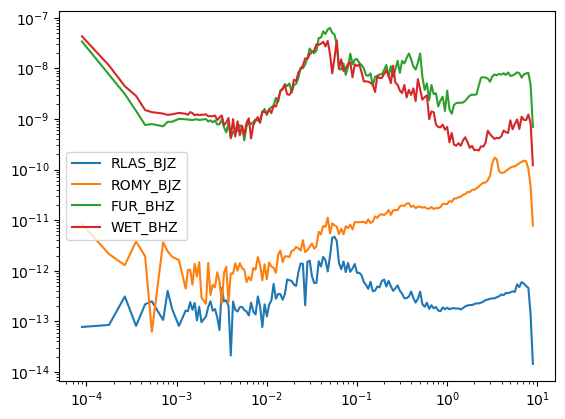

In [62]:
plt.figure()
for k in ffts.keys():

    if "Z" in k:
        plt.loglog(f, ffts[k], label=k)

plt.legend()

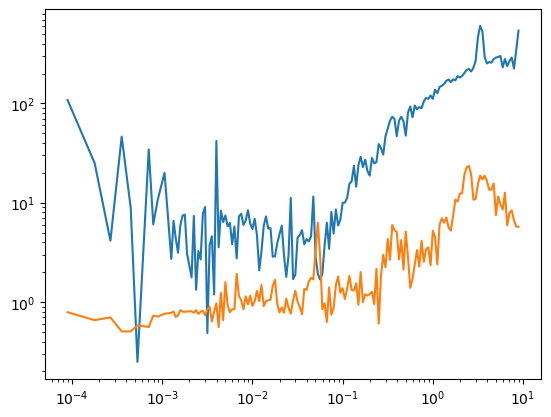

In [63]:
plt.loglog(f, ffts["ROMY_BJZ"]/ffts["RLAS_BJZ"])
plt.loglog(f, ffts["FUR_BHZ"]/ffts["WET_BHZ"])

In [88]:
from tiskitpy import SpectralDensity, DataCleaner, rptransient

In [71]:
path = "/home/andbro/Documents/ROMY/stationxml_ringlaser/station_BW_ROMY.xml"
inv0 = obs.read_inventory(path)

[INFO] Correcting traces in the frequency domain


4 Trace(s) in Stream:
BW.ROMY.10.BJZ   | 2020-09-06T06:51:18.651801Z - 2020-09-06T09:51:18.651801Z | 20.0 Hz, 216001 samples
BW.ROMY.-Z.BJU   | 2020-09-06T06:51:18.653600Z - 2020-09-06T09:51:18.653600Z | 20.0 Hz, 216001 samples
BW.ROMY.10-Z.BJZ | 2020-09-06T06:51:18.651801Z - 2020-09-06T09:51:18.601801Z | 20.0 Hz, 216000 samples
BW.ROMY.10-Z.BJZ | 2020-09-06T06:51:18.651801Z - 2020-09-06T09:51:18.601801Z | 20.0 Hz, 216000 samples

In [90]:
rptransient()

TypeError: 'module' object is not callable